In [3]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

In [4]:
def loaddata():
    data = np.loadtxt('data/data.txt',delimiter=',')
    n = data.shape[1]-1 #特征数
    X = data[:,0:n]
    y = data[:,-1].reshape(-1,1)
    return X,y

In [5]:
X,y = loaddata()

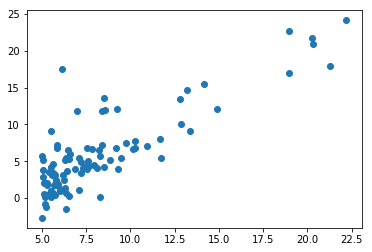

In [6]:
plt.scatter(X,y)

### 根据算法原理手动实现

#### 1、定义第一课树(最大深度设定为5)，并进行训练

In [7]:
tree_reg1 = DecisionTreeRegressor(max_depth=5)
tree_reg1.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

#### 2、计算残差，并把残差当做目标值训练第二棵树(最大深度设定为5)

In [8]:
y2 = y-tree_reg1.predict(X).reshape(-1,1)
tree_reg2 = DecisionTreeRegressor(max_depth=5)
tree_reg2.fit(X,y2)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

#### 3、继续计算残差，并把残差当做目标值训练第三棵树(最大深度设定为5)

In [9]:
y3 = y2-tree_reg2.predict(X).reshape(-1,1)
tree_reg3 = DecisionTreeRegressor(max_depth=5)
tree_reg3.fit(X,y3)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

#### 4、测试
取训练集前5条数据，并对前5条数据做预测

In [10]:
X_new = X[0:5,:]
y_pred = tree_reg1.predict(X_new)+tree_reg2.predict(X_new)+tree_reg3.predict(X_new)
print(y_pred)

[17.61560196  9.15380196 12.831       4.57199973  6.68971688]


### 直接使用sklearn提供的GradientBoostingRegressor

In [11]:
gbrt = GradientBoostingRegressor(max_depth=5,n_estimators=3,learning_rate=1.0)
gbrt.fit(X, y)
print(gbrt.predict(X_new))

[17.61560196  9.15380196 12.831       4.57199973  6.68971688]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
